In [1]:
#General 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder

#model
import xgboost as xgb
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,roc_auc_score,precision_recall_curve, average_precision_score, classification_report, confusion_matrix, make_scorer
from sklearn.ensemble import RandomForestClassifier

In [1]:
#Data Reading 
mixeddata_week01 = pd.read_csv('F:\Mixed Base Data/Week01 MixedIUB-Dataset.csv')
mixeddata_week02 = pd.read_csv('F:\Mixed Base Data/Week02 MixedIUB-Dataset.csv')
mixeddata_week03 = pd.read_csv('F:\Mixed Base Data/Week03 MixedIUB-Dataset.csv')


#Print the shape of dataset
print('\n'f'Week 01 dataset shape: {mixeddata_week01.shape}')
print('\n'f'Week 02 dataset shape: {mixeddata_week02.shape}')
print('\n'f'Week 03 dataset shape: {mixeddata_week03.shape}')

NameError: name 'pd' is not defined

In [3]:
#Data structure 
mixeddata_week01.dtypes

Label          int64
Feature01    float64
Feature02    float64
Feature03    float64
Feature04    float64
Feature05    float64
Feature06    float64
Feature07    float64
Feature08    float64
Feature09    float64
Feature0A    float64
Feature0B    float64
Feature0C    float64
Feature11    float64
Feature12    float64
Feature13    float64
Feature14    float64
Feature15    float64
Feature16    float64
Feature17    float64
Feature18    float64
Feature19    float64
Feature1A    float64
Feature1B    float64
Feature1C    float64
Feature21    float64
Feature22    float64
Feature23    float64
Feature24    float64
Feature25    float64
Feature26    float64
Feature27    float64
Feature28    float64
Feature29    float64
Feature2A    float64
Feature2B    float64
Feature2C    float64
Feature31    float64
Feature32    float64
Feature33    float64
Feature34    float64
Feature35    float64
Feature36    float64
Feature37    float64
Feature38    float64
Feature39    float64
Feature3A    float64
Feature3B    

In [2]:
mixeddata_week01.head()

NameError: name 'mixeddata_week01' is not defined

Text(0, 0.5, 'Count')

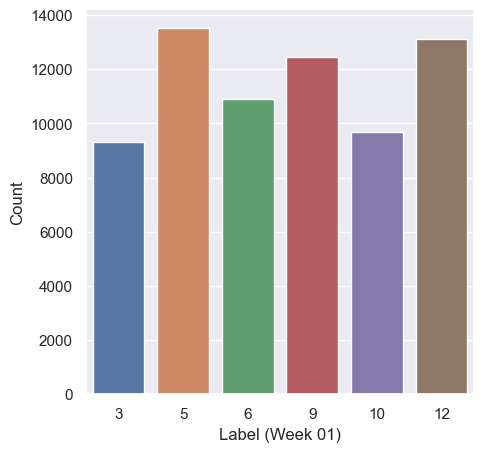

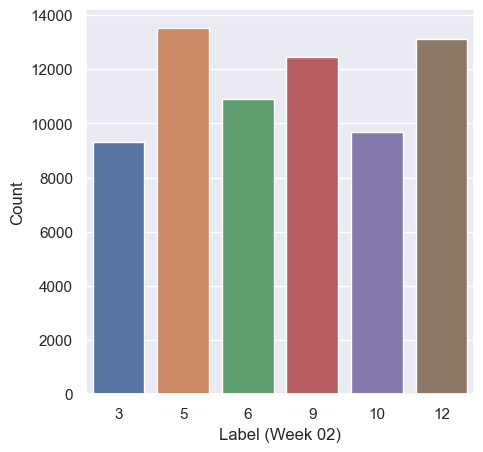

In [26]:
#Data Visualization
#Week 01
count = mixeddata_week01['Label'].value_counts()
plt.figure(figsize=(5,5))
sns.barplot(x=count.index.values, y=count.values, data=mixeddata_week01)

plt.xlabel("Label (Week 01)")
plt.ylabel("Count")

#Week 02
count = mixeddata_week01['Label'].value_counts()
plt.figure(figsize=(5,5))
sns.barplot(x=count.index.values, y=count.values, data=mixeddata_week02)

plt.xlabel("Label (Week 02)")
plt.ylabel("Count")

In [6]:
#Missing Values
print('number of missing values in week 01:', sum(mixeddata_week01.isnull().sum()))


#Duplicate values
print('\n''number of duplicates values in week 01:', mixeddata_week01.duplicated().sum())


number of missing values in week 01: 0

number of duplicates values in week 01: 0


[Text(0.5, 1.0, 'correlations Matrix')]

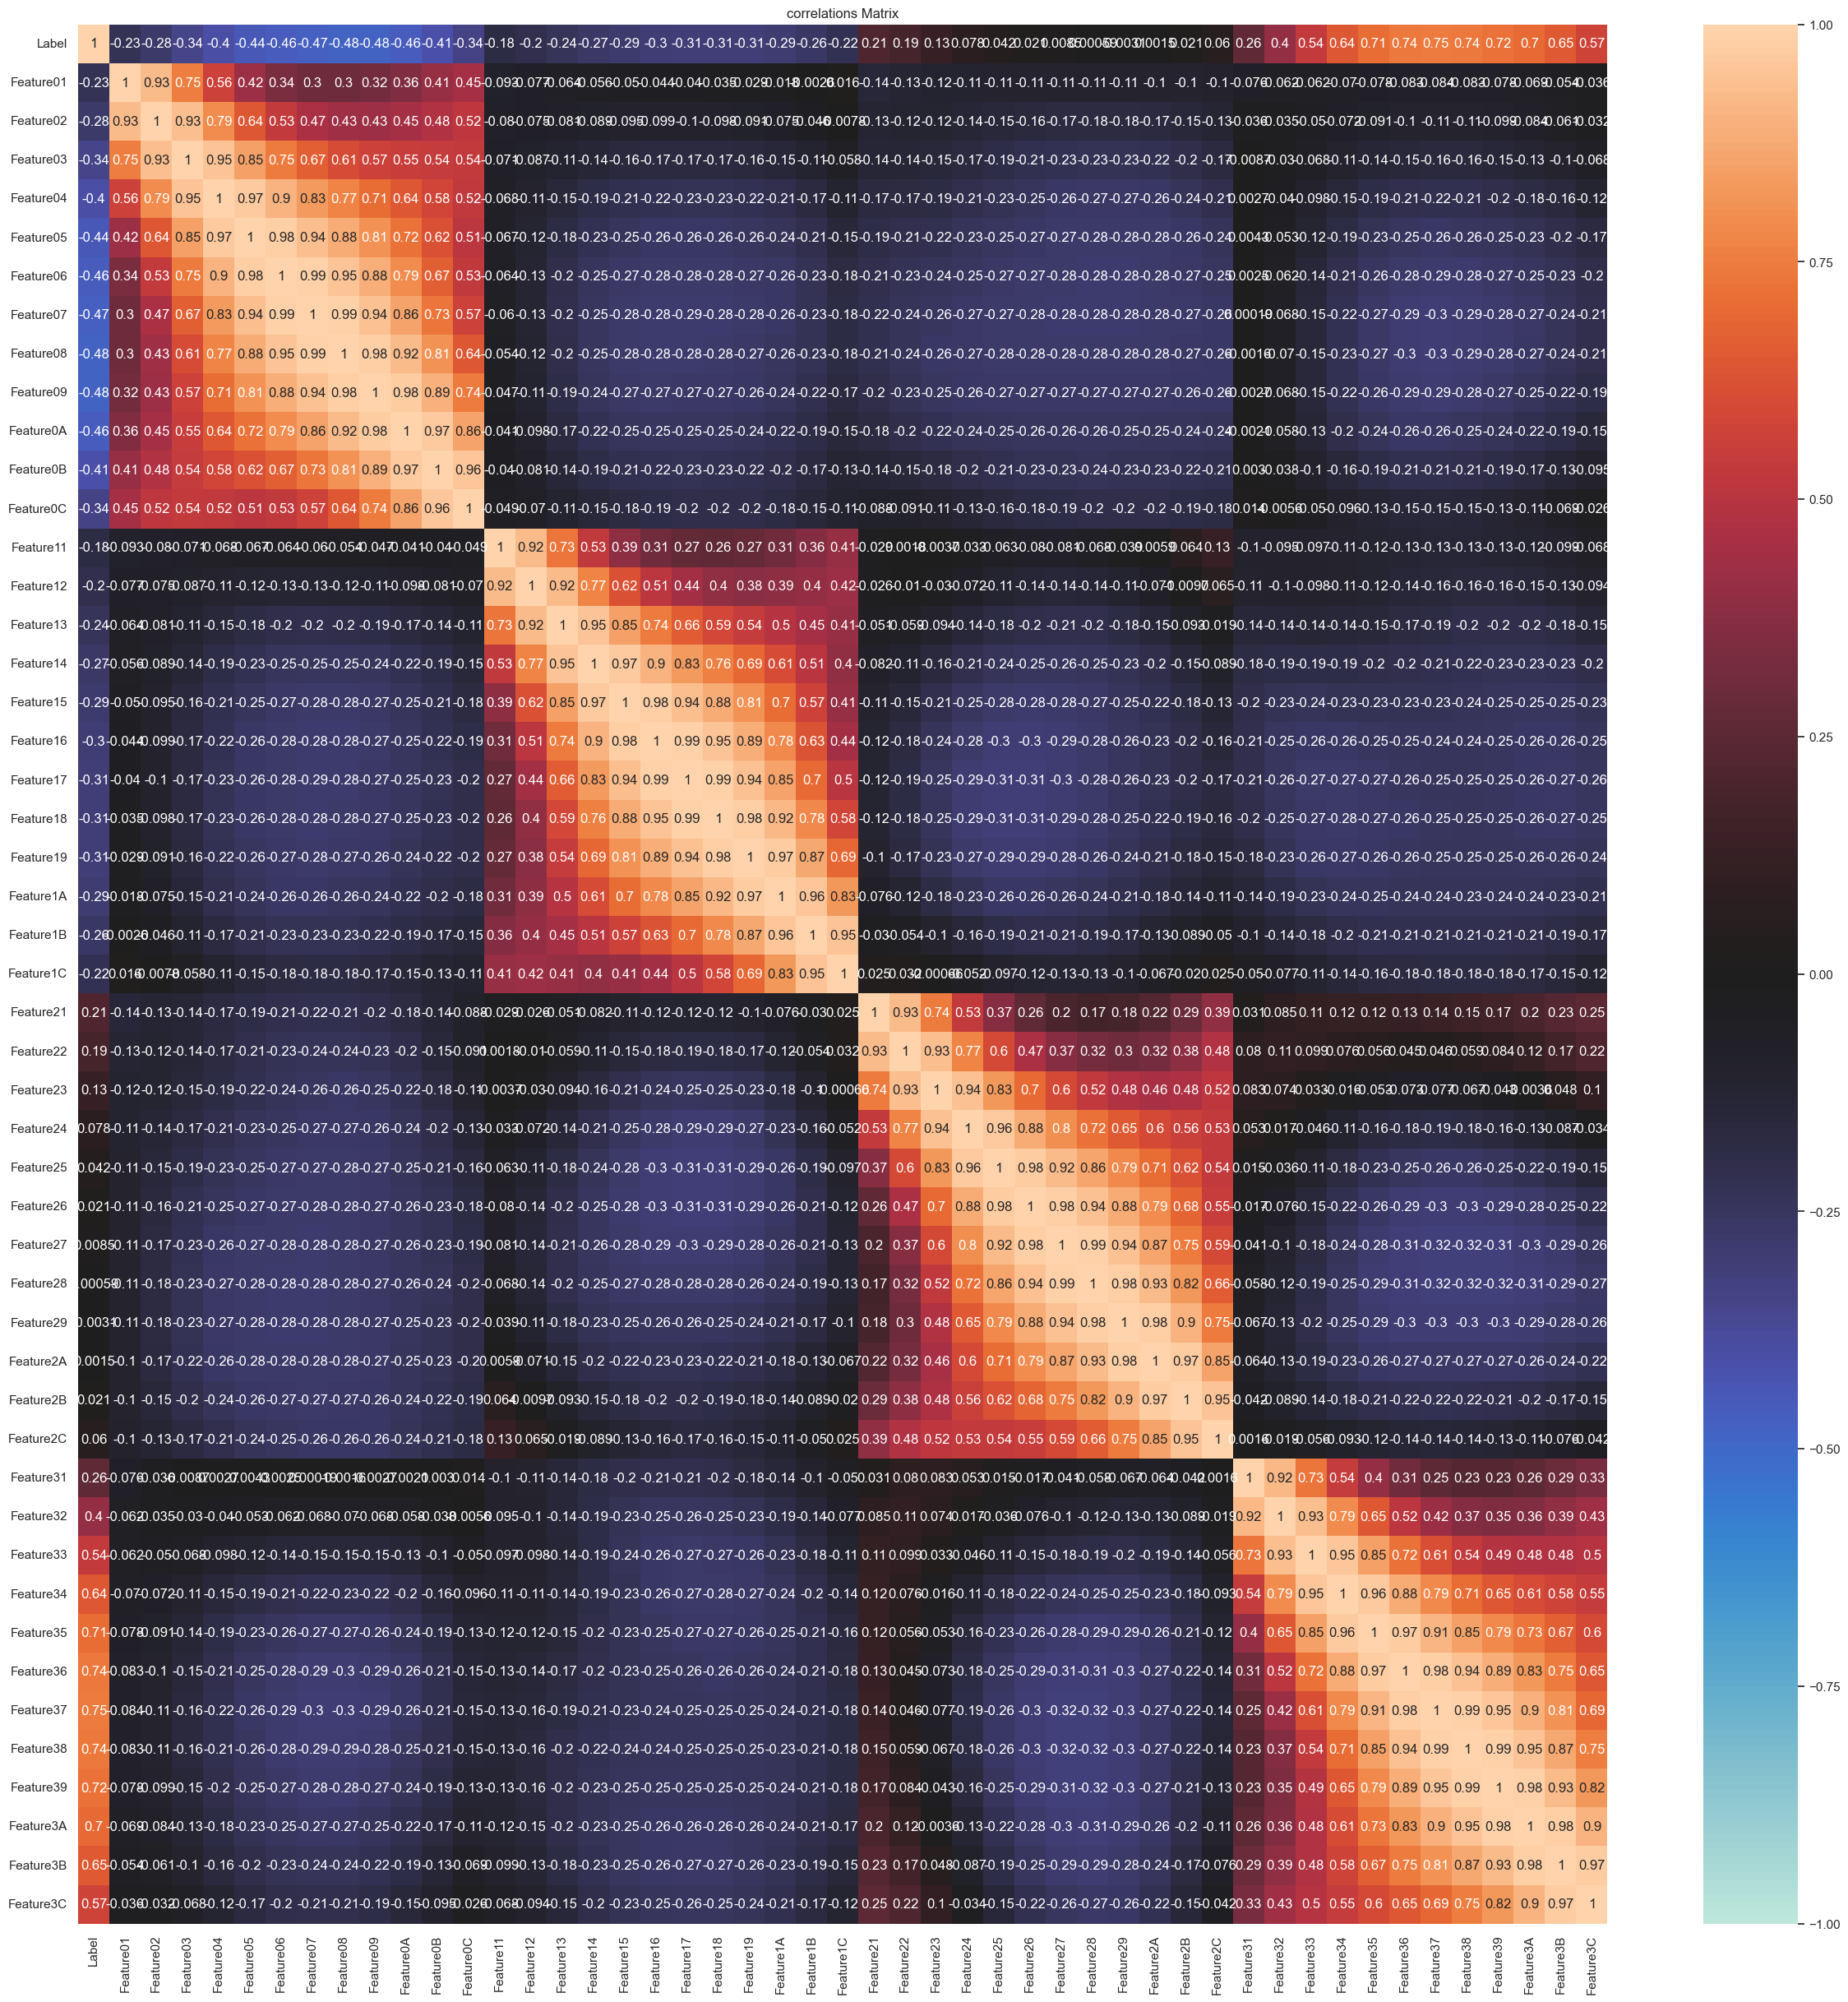

In [8]:
#Correlation Matrix

sns.set(rc={'figure.figsize': (30,30)})
sns.heatmap(mixeddata_week01.corr(), annot=True, vmin=-1, vmax=1, center=0).set(title='correlations Matrix')

In [9]:
encoder = LabelEncoder()
mixeddata_week01['Label'] = encoder.fit_transform(mixeddata_week01['Label'])

In [3]:
X = mixeddata_week01.drop('Label', axis='columns')
Y = mixeddata_week01['Label']
print(X.shape, Y.shape)

NameError: name 'mixeddata_week01' is not defined

In [4]:
#Count of each labels
Y.value_counts()

NameError: name 'Y' is not defined

In [12]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.20, random_state =42, stratify = Y)

In [5]:
#Count of each labels
Y_test.value_counts()

NameError: name 'Y_test' is not defined

In [16]:
#XG Boost
xgb_model = xgb.XGBClassifier(
    max_depth=3,
    n_estimators=1000,
    learning_rate=0.1,
    objective="multi:softmax",
    num_class=6,
    random_state=42
    )

In [17]:
#fit model
xgb_model.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=1000, n_jobs=None, num_class=6,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [18]:
Y_pred = xgb_model.predict(X_test)

In [19]:
accuracy = accuracy_score(Y_test,Y_pred)
recall = recall_score(Y_test,Y_pred, average='weighted')
precision = precision_score(Y_test,Y_pred, average='weighted')
f1 = f1_score(Y_test,Y_pred, average='weighted')


#print the results 
print("Accuracy: %.2f%%" % (accuracy*100.0))
print("Recall Score: {:.4f}".format(recall))
print("Precision Score: {:.4f}".format(precision))
print("F 1 Score: {:.4f}".format(f1))

Accuracy: 99.19%
Recall Score: 0.9919
Precision Score: 0.9919
F 1 Score: 0.9919


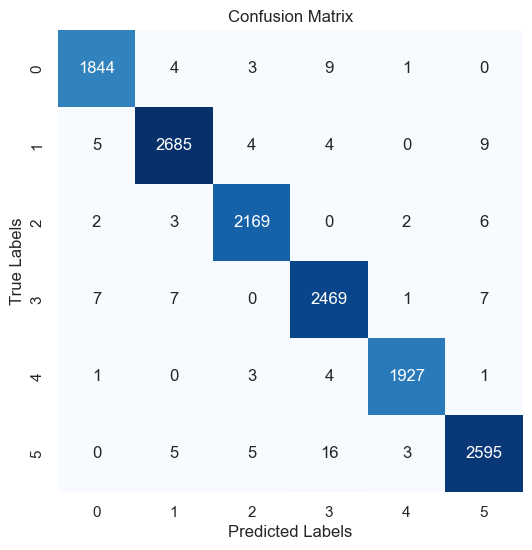

In [20]:
#compute the confusion metrix
cm = confusion_matrix(Y_test,Y_pred)

#display using heatmap
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [21]:
# Calculate class-wise precision, recall, and F1-score
precision = precision_score(Y_test, Y_pred, average=None)
recall = recall_score(Y_test, Y_pred, average=None)
f1 = f1_score(Y_test, Y_pred, average=None)


# Calculate class-wise accuracy

class_accuracy = []
for class_label in range(len(precision)):
    class_samples = (Y_test == class_label).sum()
    class_correct = np.logical_and(Y_test == Y_pred, Y_test == class_label).sum()
    class_accuracy.append(class_correct / class_samples)

# Print the class-wise metrics
for class_label in range(len(precision)):
   print(f"Class {class_label}:")
   print(f"Accuracy: {class_accuracy[class_label]}")
   print(f"Precision: {precision[class_label]}")
   print(f"Recall: {recall[class_label]}")
   print(f"F1-Score: {f1[class_label]}")
   print()

Class 0:
Accuracy: 0.9908651262761956
Precision: 0.9919311457772996
Recall: 0.9908651262761956
F1-Score: 0.9913978494623655

Class 1:
Accuracy: 0.9918729220539343
Precision: 0.9929733727810651
Recall: 0.9918729220539343
F1-Score: 0.9924228423581594

Class 2:
Accuracy: 0.9940421631530706
Precision: 0.9931318681318682
Recall: 0.9940421631530706
F1-Score: 0.9935868071461292

Class 3:
Accuracy: 0.9911682055399438
Precision: 0.986810551558753
Recall: 0.9911682055399438
F1-Score: 0.9889845784097736

Class 4:
Accuracy: 0.9953512396694215
Precision: 0.9963805584281282
Recall: 0.9953512396694215
F1-Score: 0.9958656330749355

Class 5:
Accuracy: 0.9889481707317073
Precision: 0.9912146676852559
Recall: 0.9889481707317073
F1-Score: 0.990080122090805



In [57]:
encoder = LabelEncoder()
mixeddata_week02['Label'] = encoder.fit_transform(mixeddata_week02['Label'])
mixeddata_week03['Label'] = encoder.fit_transform(mixeddata_week03['Label'])


In [58]:
X_2 = mixeddata_week02.drop('Label', axis='columns')
Y_2 = mixeddata_week02['Label']
X_3 = mixeddata_week03.drop('Label', axis='columns')
Y_3 = mixeddata_week03['Label']

In [59]:
Y_pred_2 = xgb_model.predict(X_2)
Y_pred_3 = xgb_model.predict(X_3)

In [60]:
accuracy_2 = accuracy_score(Y_2,Y_pred_2)
recall_2 = recall_score(Y_2,Y_pred_2, average='weighted')
precision_2 = precision_score(Y_2,Y_pred_2, average='weighted')
f1_2 = f1_score(Y_2,Y_pred_2, average='weighted')


#print the results 
print("Accuracy: %.2f%%" % (accuracy_2*100.0))
print("Recall Score: {:.4f}".format(recall_2))
print("Precision Score: {:.4f}".format(precision_2))
print("F 1 Score: {:.4f}".format(f1_2))

Accuracy: 98.98%
Recall Score: 0.9898
Precision Score: 0.9898
F 1 Score: 0.9898


In [61]:
accuracy_3 = accuracy_score(Y_3,Y_pred_3)
recall_3 = recall_score(Y_3,Y_pred_3, average='weighted')
precision_3 = precision_score(Y_3,Y_pred_3, average='weighted')
f1_3 = f1_score(Y_3,Y_pred_3, average='weighted')


#print the results 
print("Accuracy: %.2f%%" % (accuracy_3*100.0))
print("Recall Score: {:.4f}".format(recall_3))
print("Precision Score: {:.4f}".format(precision_3))
print("F 1 Score: {:.4f}".format(f1_3))

Accuracy: 99.14%
Recall Score: 0.9914
Precision Score: 0.9914
F 1 Score: 0.9914


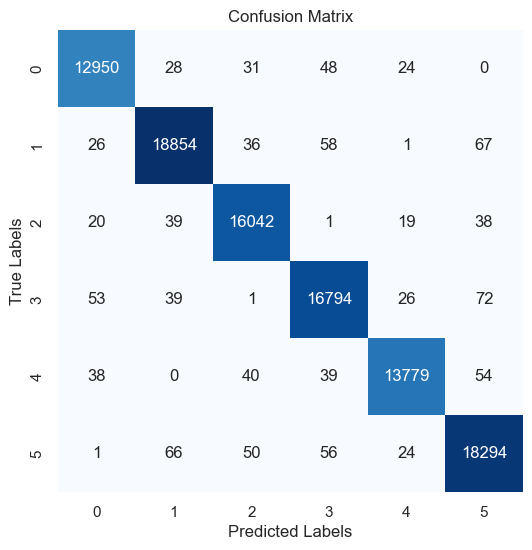

In [52]:
cm = confusion_matrix(Y_2,Y_pred_2)

#display using heatmap
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

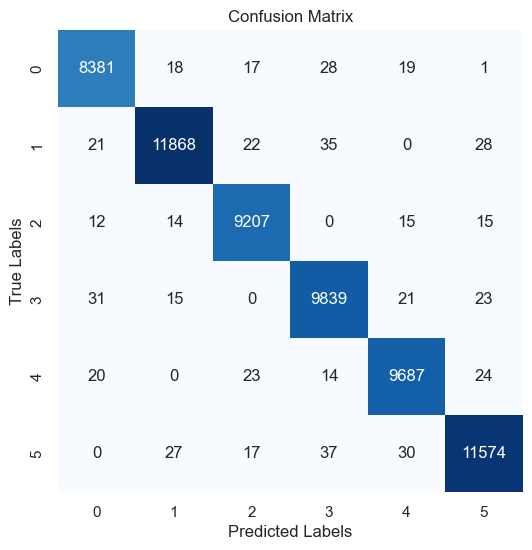

In [62]:
cm = confusion_matrix(Y_3,Y_pred_3)

#display using heatmap
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Random forest

In [63]:
RandomForest_model = RandomForestClassifier()

In [64]:
RandomForest_model.fit(X_train,Y_train)

RandomForestClassifier()

In [65]:
Y_pred_rand = RandomForest_model.predict(X_test)

In [66]:
accuracy = accuracy_score(Y_test,Y_pred_rand)
recall = recall_score(Y_test,Y_pred_rand, average='weighted')
precision = precision_score(Y_test,Y_pred_rand, average='weighted')
f1 = f1_score(Y_test,Y_pred_rand, average='weighted')


#print the results 
print("Accuracy: %.2f%%" % (accuracy*100.0))
print("Recall Score: {:.4f}".format(recall))
print("Precision Score: {:.4f}".format(precision))
print("F 1 Score: {:.4f}".format(f1))

Accuracy: 99.33%
Recall Score: 0.9933
Precision Score: 0.9933
F 1 Score: 0.9933


In [67]:
Y_pred_rand_2 = RandomForest_model.predict(X_2)
Y_pred_rand_3 = RandomForest_model.predict(X_3)

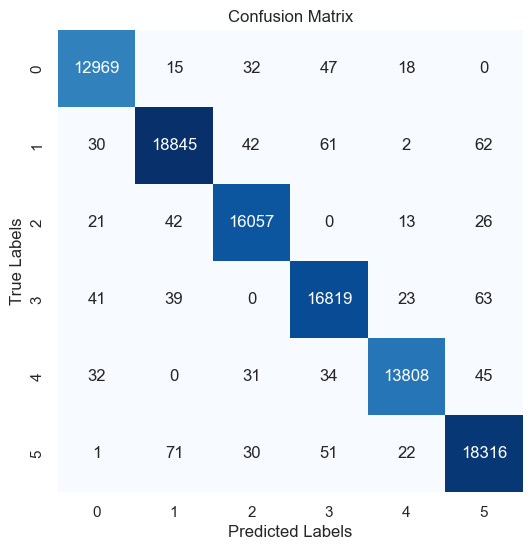

In [68]:
cm = confusion_matrix(Y_2,Y_pred_rand_2)

#display using heatmap
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

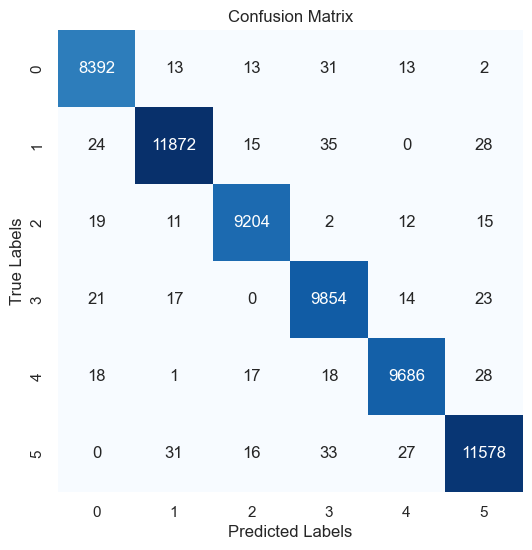

In [70]:
cm = confusion_matrix(Y_3,Y_pred_rand_3)

#display using heatmap
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()